In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
#https://www.kaggle.com/datasets/tanshihjen/early-stage-diabetes-risk-prediction
dataset = pd.read_csv('/kaggle/input/early-stage-diabetes-risk-prediction/diabetes_risk_prediction_dataset.csv') 

In [34]:
positive_cases = len(dataset[dataset['class'] == 'Positive'])
positive_cases

320

In [39]:
negative_cases = len(dataset[dataset['class'] == 'Negative'])
negative_cases

200

In [53]:
for col in x.columns:
    print('column variable name:', col)
    print("possible values:", dataset[col].unique())
    print()

column variable name: Age
possible values: [40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]

column variable name: Gender
possible values: ['Male' 'Female']

column variable name: Polyuria
possible values: ['No' 'Yes']

column variable name: Polydipsia
possible values: ['Yes' 'No']

column variable name: sudden weight loss
possible values: ['No' 'Yes']

column variable name: weakness
possible values: ['Yes' 'No']

column variable name: Polyphagia
possible values: ['No' 'Yes']

column variable name: Genital thrush
possible values: ['No' 'Yes']

column variable name: visual blurring
possible values: ['No' 'Yes']

column variable name: Itching
possible values: ['Yes' 'No']

column variable name: Irritability
possible values: ['No' 'Yes']

column variable name: delayed healing
possible values: ['Yes' 'No']

column variable name: partial paresis
possible values: ['No' 'Yes']

column v

In [75]:
y = dataset['class']
x = dataset.drop(columns=['class'])

In [76]:
values = {'Yes':1, 'No':0}
gender = {'Male': 1, 'Female': 0}

In [77]:
for i in x.columns[2:]:
    x[i] = x[i].map(values)
x['Gender'] = x['Gender'].map(gender)

In [78]:
mean_age = x['Age'].mean()
std_age = x['Age'].std()

x['Age'] = (x['Age'] - mean_age) / std_age

In [79]:
for col in x.columns:
    print('column variable name:', col)
    print("possible values:", x[col].unique())
    print()

column variable name: Age
possible values: [-6.60730661e-01  8.20572090e-01 -5.78436063e-01 -2.49257674e-01
  9.85161284e-01  5.73688298e-01  7.38277493e-01  1.47892887e+00
  1.56122347e+00  1.80810726e+00 -3.31552272e-01 -8.25319855e-01
 -1.07220365e+00  1.06745588e+00  4.91393701e-01 -4.13846869e-01
  1.14975048e+00 -7.43025258e-01 -2.37388261e-03 -1.31908744e+00
 -4.96141466e-01  3.26804506e-01  4.09099104e-01 -9.07614452e-01
  7.99207146e-02  1.23204508e+00 -1.48367663e+00  1.62215312e-01
 -1.66963077e-01 -9.89909050e-01  2.44509909e-01  9.02866687e-01
  1.39663427e+00 -1.89514962e+00 -8.46684799e-02 -1.64826583e+00
  1.64351806e+00  6.55982895e-01 -1.40138204e+00  3.04252622e+00
  3.45399920e+00  1.97269645e+00  1.72581266e+00  2.54875863e+00
 -1.15449824e+00 -2.63580099e+00 -1.23679284e+00  1.31433967e+00
 -1.73056042e+00 -1.56597123e+00 -1.81285502e+00]

column variable name: Gender
possible values: [1 0]

column variable name: Polyuria
possible values: [0 1]

column variable na

In [92]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [123]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators':[1, 10, 25, 50, 100, 1000],
          'criterion': ['gini', 'entropy', 'log_loss'],
          'max_depth': [2, 3, 4, 5, 6],
          'min_samples_split': [1, 2, 3]}

RFC = RandomForestClassifier()

grid = GridSearchCV(estimator=RFC, param_grid=params, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_test, y_test)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/u

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [1, 10, 25, 50, 100, 1000]},
             scoring='roc_auc', verbose=1)

In [124]:
RFC = RandomForestClassifier(criterion=grid.best_params_['criterion'],
                             max_depth=grid.best_params_['max_depth'],
                             min_samples_split=grid.best_params_['min_samples_split'],
                             n_estimators=grid.best_params_['n_estimators'])

RFC.fit(X_test, y_test)
RFC.score(X_train, y_train)

0.941025641025641

In [131]:
confusion_matrix = [[0, 0],
                    [0, 0]]

for x, y in zip(RFC.predict(X_test), y_test):
    if x == y:
        if x == 'Positive':
            confusion_matrix[0][0] += 1
        else:
            confusion_matrix[1][1] += 1
    else:
        if x == 'Positive':
            confusion_matrix[1][0] += 1
        else:
            confusion_matrix[0][1] += 1

[[83, 1], [0, 46]]

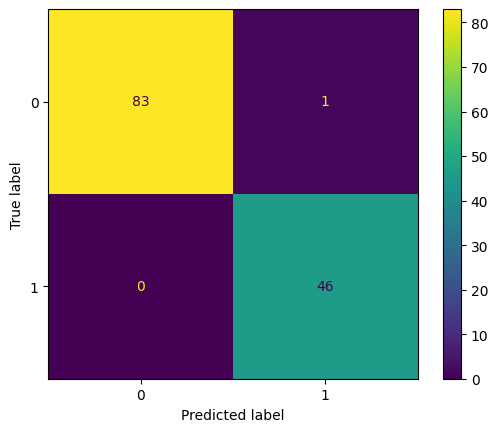

In [136]:
from sklearn.metrics import ConfusionMatrixDisplay

d = ConfusionMatrixDisplay(np.array(confusion_matrix))
d.plot()